# Sanity check
Import the metadata from AR6 runs and check that they vaguely correspond to the values of carbon budget resultant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_excel("../InputData/AR6_Scenarios_Database_metadata_indicators_v1.0.xlsx", sheet_name="meta")

In [3]:
meta.columns

Index(['Model', 'Scenario', 'Category', 'Category_name', 'Category_subset',
       'Subset_Ch4', 'Category_Vetting_historical', 'IMP_marker',
       'Literature Reference (if applicable)', 'Policy_category',
       'Policy_category_name', 'Project_study', 'CO2 emissions 2030 Gt CO2/yr',
       'CO2 emissions 2050 Gt CO2/yr', 'CO2 emissions 2100 Gt CO2/yr', 'COVID',
       'GDP|MER-per-capita-in-2100', 'GDP|MER-per-capita-in-2100_bin',
       'GHG emissions 2030 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2050 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2100 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'GHG emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2040 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2050 % modelled Ha

In [4]:
target = 1.5
tol = 0.05

In [5]:
magiccmed = "Median peak warming (MAGICCv7.5.3)"
fairmed = "Median peak warming (FaIRv1.6.2)"
cumco2 = "Cumulative net CO2 (2020 to netzero, Gt CO2) (Harm-Infilled)"
magicc_scen = meta.loc[
    (meta[magiccmed] > target-tol) & (meta[magiccmed] < target+tol), 
    :
]
magicc_scen[cumco2].mean()

480.48825269101883

In [6]:
fair_scen = meta.loc[
    (meta[fairmed] > target-tol) & (meta[fairmed] < target+tol), 
    :
]
fair_scen[cumco2].mean()

550.2045818004233

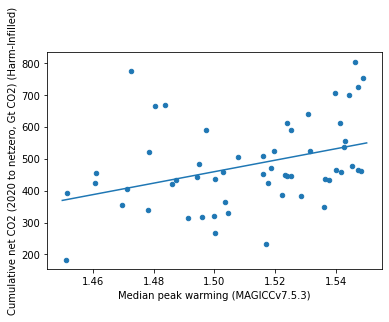

In [7]:
magicc_scen.plot(magiccmed, cumco2, kind="scatter")
magm, magb = np.polyfit(magicc_scen[magiccmed], magicc_scen[cumco2], 1)
plt.plot([target - tol, target + tol], [magm*(target-tol)+magb, magm*(target+tol)+magb])

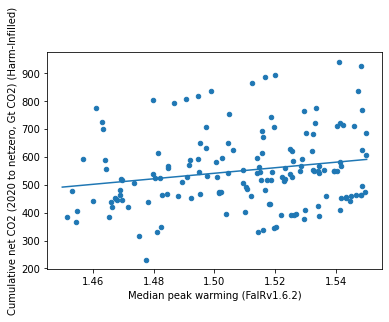

In [8]:
fair_scen.plot(fairmed, cumco2, kind="scatter")
fairm, fairb = np.polyfit(fair_scen[fairmed], fair_scen[cumco2], 1)
plt.plot([target-tol, target+tol], [fairm*(target-tol)+fairb, fairm*(target+tol)+fairb])

In [9]:
magm * 1.5 + magb

459.674132422846

In [10]:
fairm * 1.5 + fairb

541.2167417593608

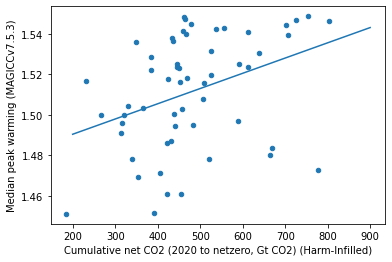

In [11]:
# Also do the plot considering errors only in warming
lolim = 200
hilim = 900
magicc_scen.plot(cumco2, magiccmed, kind="scatter")
magmiv, magbiv = np.polyfit(magicc_scen[cumco2], magicc_scen[magiccmed], 1)
plt.plot([lolim, hilim],  [magmiv*lolim+magbiv, magmiv*hilim+magbiv])

In [12]:
(1.5 - magbiv) / magmiv

327.1618214035919

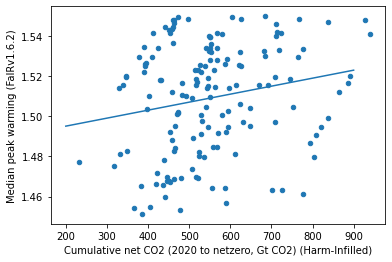

In [13]:
fair_scen.plot(cumco2, fairmed, kind="scatter")
fairmiv, fairbiv = np.polyfit(fair_scen[cumco2], fair_scen[fairmed], 1)
plt.plot([lolim, hilim],  [fairmiv*lolim+fairbiv, fairmiv*hilim+fairbiv])

In [14]:
(1.5 - fairbiv) / fairmiv

322.83144449730025

It seems like the sanity check has rather weak force due to the inconsistency across parameterisations, but the paper-reported values plus 2 years of emissions (~80 Gt) are within the range of values from the sanity check. 